## Ultimate Technologies Inc. Take-Home Challenge

## 1-Imports and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import datetime
import calendar


In [2]:
f= open('logins.json')
data = json.load(f)

In [3]:
df= pd.DataFrame(data)

## 2- Explore Data

In [4]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [6]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3


In [7]:
df['login_time']= pd.to_datetime(df['login_time'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [9]:
df['login_time'].min(), df['login_time'].max()

(Timestamp('1970-01-01 20:12:16'), Timestamp('1970-04-13 18:57:38'))

In [10]:
df['count']=1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   count       93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [12]:
df= df.sort_values(by='login_time')

In [13]:
df.head(10)

,login_time,count
6,1970-01-01 20:12:16,1
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
3,1970-01-01 20:16:36,1
2,1970-01-01 20:16:37,1
5,1970-01-01 20:21:41,1
10,1970-01-01 20:26:05,1
4,1970-01-01 20:26:21,1
11,1970-01-01 20:31:03,1
12,1970-01-01 20:34:46,1


> Aggregate times into 15 minutes intervals and count the frequency at each time interval

In [14]:
df_n= df.groupby(pd.Grouper(freq='15T',key='login_time'))['count'].sum()

In [15]:
df_n.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: count, dtype: int64

In [16]:
df_n= pd.DataFrame(df_n)

In [17]:
df_n= df_n.reset_index()

In [18]:
df_n.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


> Create new features to get insights on the data

In [19]:
df_n['nf_time']= [d.time() for d in df_n['login_time']]
df_n['nf_date']= [d.date() for d in df_n['login_time']]
df_n['nf_month']= [d.month for d in df_n['login_time']]
df_n['nf_day']= [d.day for d in df_n['login_time']]
df_n['nf_weekday']= [d.weekday() for d in df_n['login_time']]
df_n['nf_weekday_name']= [calendar.day_name[d] for d in df_n['nf_weekday']]

In [20]:
df_n.head()

,login_time,count,nf_time,nf_date,nf_month,nf_day,nf_weekday,nf_weekday_name
0,1970-01-01 20:00:00,2,20:00:00,1970-01-01,1,1,3,Thursday
1,1970-01-01 20:15:00,6,20:15:00,1970-01-01,1,1,3,Thursday
2,1970-01-01 20:30:00,9,20:30:00,1970-01-01,1,1,3,Thursday
3,1970-01-01 20:45:00,7,20:45:00,1970-01-01,1,1,3,Thursday
4,1970-01-01 21:00:00,1,21:00:00,1970-01-01,1,1,3,Thursday


In [21]:
df_perweekday= df_n.groupby('nf_weekday_name')['count'].sum()


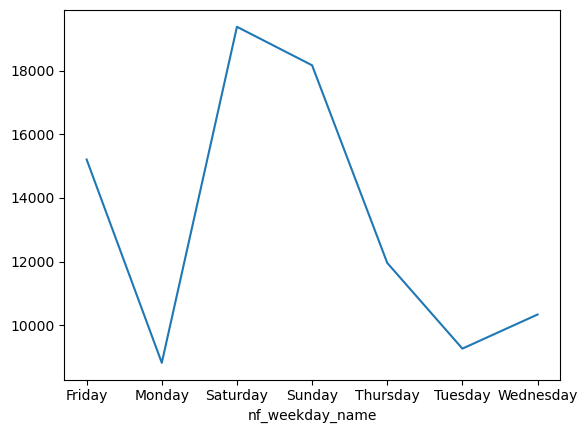

In [22]:
df_perweekday.plot();


We can see most of the trips were done on Saturday and Sunday in this specific location. This could indicate more remote work which leads to less commute to work during the weekdays.

Next we can see the correlations between different day of the weeks, times of the day and number of trips using a correlation heatmap.

In [23]:
df_weekday_hour= df_n.groupby(['nf_weekday_name', 'nf_time'])['count'].sum()
df_weekday_hour= pd.DataFrame(df_weekday_hour, columns=['count']).reset_index()
df_weekday_hour.head()

,nf_weekday_name,nf_time,count
0,Friday,00:00:00,237
1,Friday,00:15:00,263
2,Friday,00:30:00,232
3,Friday,00:45:00,243
4,Friday,01:00:00,259


In [24]:
import seaborn as sns

In [25]:
piv = pd.pivot_table(df_weekday_hour, values="count",index=["nf_weekday_name"], columns=["nf_time"], fill_value=0)


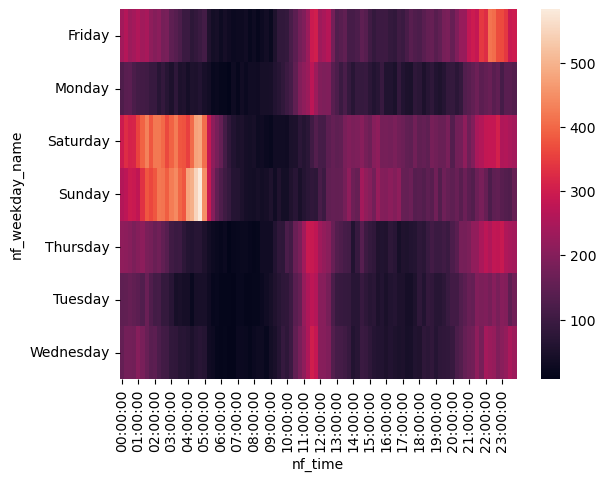

In [26]:
sns.heatmap(piv);

We can clearly see the number of trips are the highest late Friday night and early Saturday morning, and then late Saturday night and early Sunday morning which shows most of the trips are probably related to people's parties and fun events :)

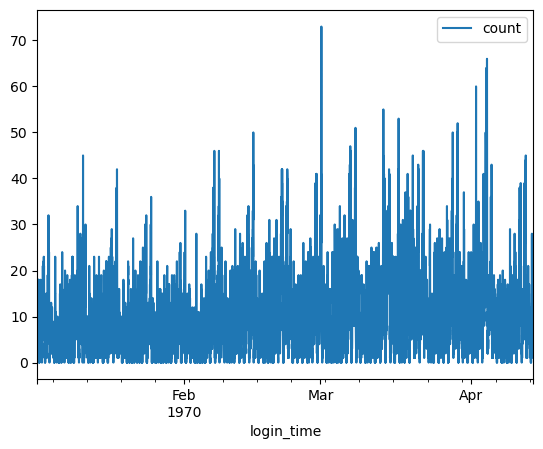

In [27]:
df_n.plot('login_time', 'count');

In [28]:
df_jan= df_n[df_n['nf_month']==1]
df_feb= df_n[df_n['nf_month']==2]
df_mar= df_n[df_n['nf_month']==3]
df_apr= df_n[df_n['nf_month']==4]

In [29]:
df_jan.head()

,login_time,count,nf_time,nf_date,nf_month,nf_day,nf_weekday,nf_weekday_name
0,1970-01-01 20:00:00,2,20:00:00,1970-01-01,1,1,3,Thursday
1,1970-01-01 20:15:00,6,20:15:00,1970-01-01,1,1,3,Thursday
2,1970-01-01 20:30:00,9,20:30:00,1970-01-01,1,1,3,Thursday
3,1970-01-01 20:45:00,7,20:45:00,1970-01-01,1,1,3,Thursday
4,1970-01-01 21:00:00,1,21:00:00,1970-01-01,1,1,3,Thursday


In [30]:
df_jan_perday= df_jan.groupby('nf_day')['count'].sum()
df_feb_perday= df_feb.groupby('nf_day')['count'].sum()
df_mar_perday= df_mar.groupby('nf_day')['count'].sum()
df_apr_perday= df_apr.groupby('nf_day')['count'].sum()

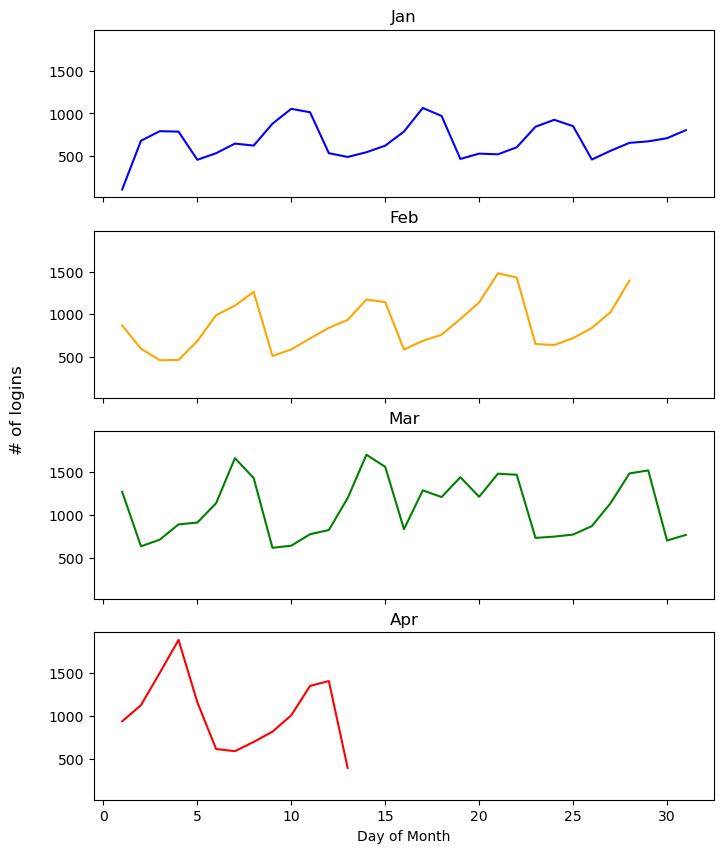

In [31]:
fig, ax= plt.subplots(4, 1, figsize=(8,10), sharex= True, sharey=True)
df_jan_perday.plot(label= 'Jan', ax=ax[0], c='b')
df_feb_perday.plot(label= 'Feb', ax=ax[1], c='orange')
df_mar_perday.plot(label= 'Mar', ax=ax[2], c='g')
df_apr_perday.plot(label= 'Apr', ax=ax[3], c='r')

ax[0].title.set_text('Jan')
ax[1].title.set_text('Feb')
ax[2].title.set_text('Mar')
ax[3].title.set_text('Apr')

fig.supylabel('# of logins')
plt.xlabel('Day of Month');
plt.show();

Plots of trips in each month show kind of a pattern which goes up and down during the month. But not a very specific pattern. 

In [32]:
df_jan_perhour= df_jan.groupby('nf_time')['count'].sum()
df_feb_perhour= df_feb.groupby('nf_time')['count'].sum()
df_mar_perhour= df_mar.groupby('nf_time')['count'].sum()
df_apr_perhour= df_apr.groupby('nf_time')['count'].sum()

In [33]:
# df_jan_perhour.head()

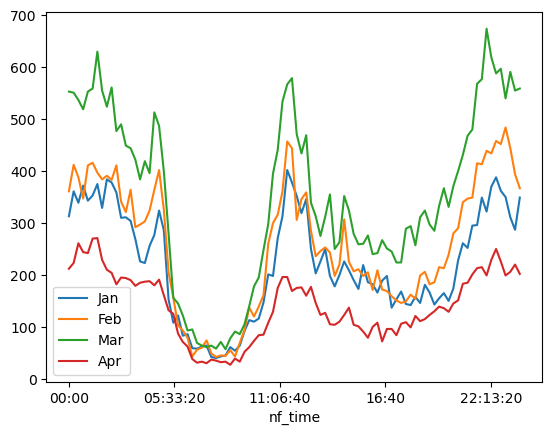

In [34]:
df_jan_perhour.plot(label= 'Jan')
df_feb_perhour.plot(label= 'Feb')
df_mar_perhour.plot(label= 'Mar')
df_apr_perhour.plot(label= 'Apr')
plt.legend()
plt.show();

The plot of trips during different hours of the day for each month show a clear pattern. The highest numbers of trips were done at late night and early mornings. Number of trips are less during 6-9 am in the morning. 

In [35]:
df_jan_perweekday= df_jan.groupby('nf_weekday_name')['count'].sum()
df_feb_perweekday= df_feb.groupby('nf_weekday_name')['count'].sum()
df_mar_perweekday= df_mar.groupby('nf_weekday_name')['count'].sum()
df_apr_perweekday= df_apr.groupby('nf_weekday_name')['count'].sum()

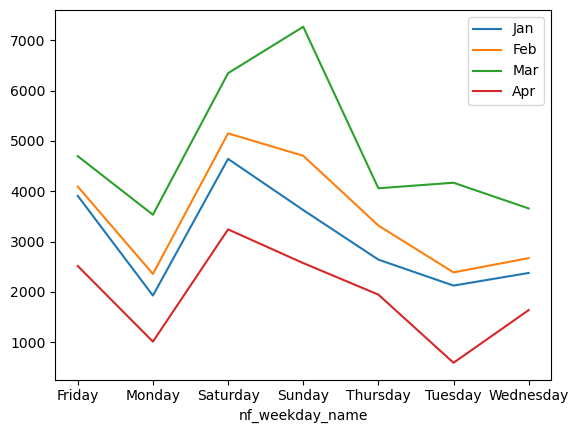

In [36]:
df_jan_perweekday.plot(label= 'Jan')
df_feb_perweekday.plot(label= 'Feb')
df_mar_perweekday.plot(label= 'Mar')
df_apr_perweekday.plot(label= 'Apr')
plt.legend()
plt.show();

This plot is confirming the highest numbers of trips during the weekend.